# The Gender Gap In College Degrees

This notebook is an excercise from [a dataquest.io course - Storytelling Through Data Visualization](https://www.dataquest.io/course/storytelling-data-visualization). Data are also downloaded from there. 

The aim of the notebook is to find out if there was a gender gap in college degrees in years 1970 to 2012 and visualize the findings using Matplotlib and Seaborn Python Libraries.

## Data

The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col='Year')
women_degrees.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Matplotlib Grid

This visualization is the execution of the dataquest.io excercise.

In [3]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# these lists are ordered in descending order by the percentage of degrees awarded to women
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

columns = [stem_cats, lib_arts_cats, other_cats]

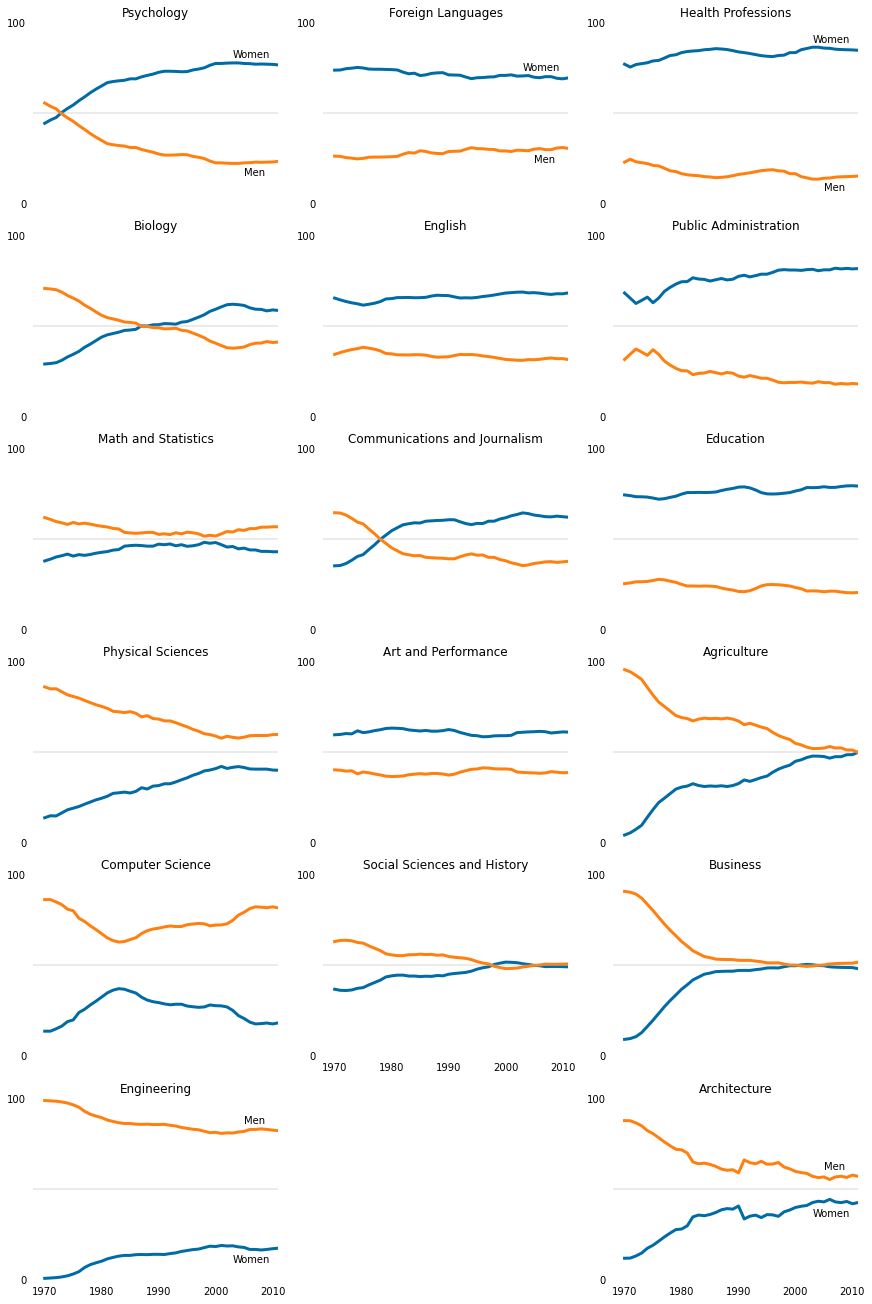

In [4]:
def populate_plot(ax, degree_data, show_labels=False):
    ax.plot(women_degrees.index, degree_data, c=cb_dark_blue, label='Women', linewidth=3)
    male_data = 100 - degree_data
    ax.plot(women_degrees.index, male_data, c=cb_orange, label='Men', linewidth=3)
    
    if show_labels:
        last_male = male_data[2011]
        last_female = degree_data[2011]
        if last_male > last_female:
            ax.text(2005, last_male + 4, 'Men')
            ax.text(2003, last_female - 8, 'Women')
        else:
            ax.text(2003, last_female + 4, 'Women')
            ax.text(2005, last_male - 8, 'Men')
    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_yticks([0,100])
    ax.set_title(degree_data.name)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    # show years in the bottom charts
    if degree_data.name in ['Engineering', 'Social Sciences and History', 'Architecture']:
        ax.tick_params(labelbottom='on')


fig1, f1_axes = plt.subplots(ncols=3, nrows=6, sharex='col', constrained_layout=True, figsize=(12, 18))

for col_index, col in enumerate(columns):
    for row_index in range(6):
        ax = f1_axes[row_index][col_index]
        
        # skipping the empty bottom middle chart
        if (col_index == 1) and (row_index == 5):
            fig1.delaxes(ax)
            continue
        
        degree = columns[col_index][row_index]
        degree_data = women_degrees[degree]
        show_labels = (row_index == 0) or (row_index == 5)
        populate_plot(ax, degree_data, show_labels)
        
# plt.show()
plt.savefig("gender_degrees.png")

Even though this is an expected result for the exercise, I don't think it is good enough. Some issues:
- Because each plot is not separated from another the labels can get easily confusing in the middle. Is Education graph to the top or to the bottom the education label? The reason for this was to increase data-ink ratio (as per Tufte), but I think leaving at least faint grids would be useful. Alternatively adding more spacing between the graphs could help.
- The `[0, 100]` range can be removed from the middle column, it clutter the view appearing so many times. And on the right column it should be either removed entirely or moved to the right
- The same data are represented via 2 lines intead of just one (each `Men` line is just `100 - Women`)

## Seaborn 

Here is a matplotlib wrapper library and my idea of how to visualize the same data.

In [5]:
sns.set_style('white', {'axes.edgecolor':'gray'})

### Simple line comparison

This chart simply shows the data itself as it is in the source - 17 categories of college degrees and percentages of women studying them. Even though the exact percentage is hard to discern for every degree, this overall picture is useful as it gives the intuition about the whole picture and provokes some interesting questions:
- the overall percentage of women grew with time in very many fields, espetially during 1970--1985
- there are a categories that were always (during the period) predominantly female
- there are 2 clear outliers where percentage of women is very low - `Engineering` and `Computer Science`
- `Computer Science` women degrees had an interesting trend up in the years 1971 -- 1983, which for some interesting reason finished. Then in 2000s the line again has a very steep slope, but there it's a negative trend. What caused those changes? Were there some state regulations at place or is it only the cultural shifts?
- the line with the steepest slopes is `Architecture` - positive in ~1981 and negative in 1991. What happened then?

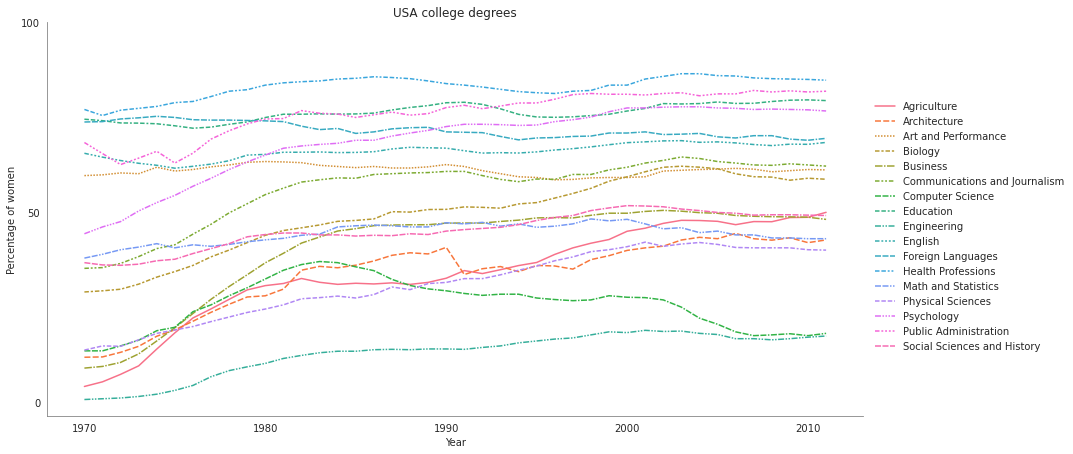

In [6]:
# make colors consistent for each category over the 4 line charts
colors = pd.Series(index=women_degrees.columns, data=sns.color_palette("husl", len(women_degrees.columns)))


def line_chart(data):
    pallete = colors[data.columns].tolist()
    all_cat_plot = sns.relplot(
        data=data,
        height=6, aspect=2, 
        kind="line",
        palette=pallete
    )
    all_cat_plot.set(yticks=[0, 50, 100], ylabel='Percentage of women', title="USA college degrees")

    plt.show()
    
line_chart(women_degrees)

To see more detailed line representation we could create 3 separate charts as we already separated data by 3 large groups - `STEM`, `Liberal Arts`, `Other`.

#### STEM

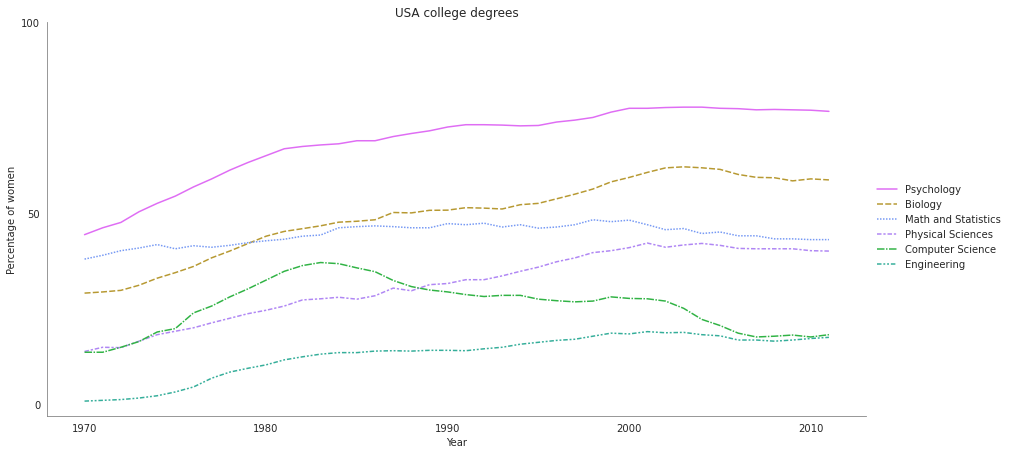

In [7]:
line_chart(women_degrees[stem_cats])

#### Liberal Arts

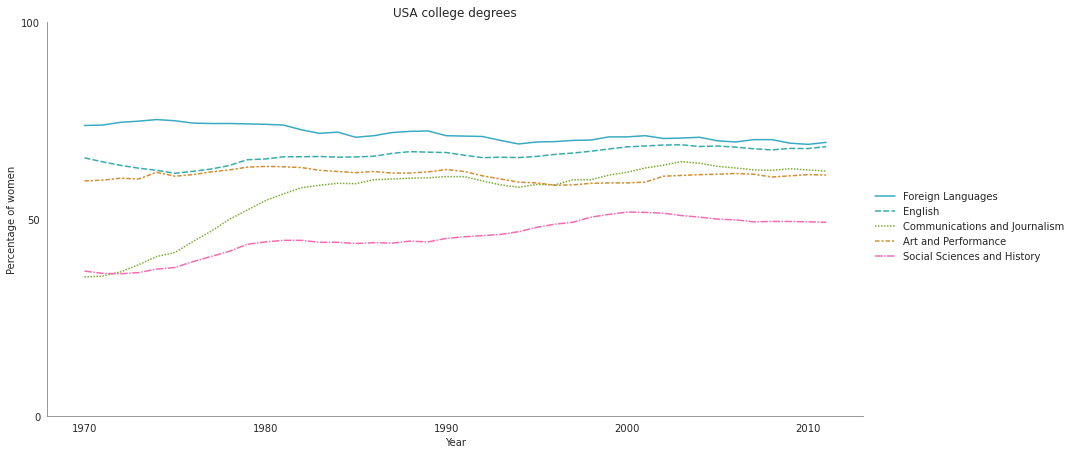

In [8]:
line_chart(women_degrees[lib_arts_cats])

#### Other

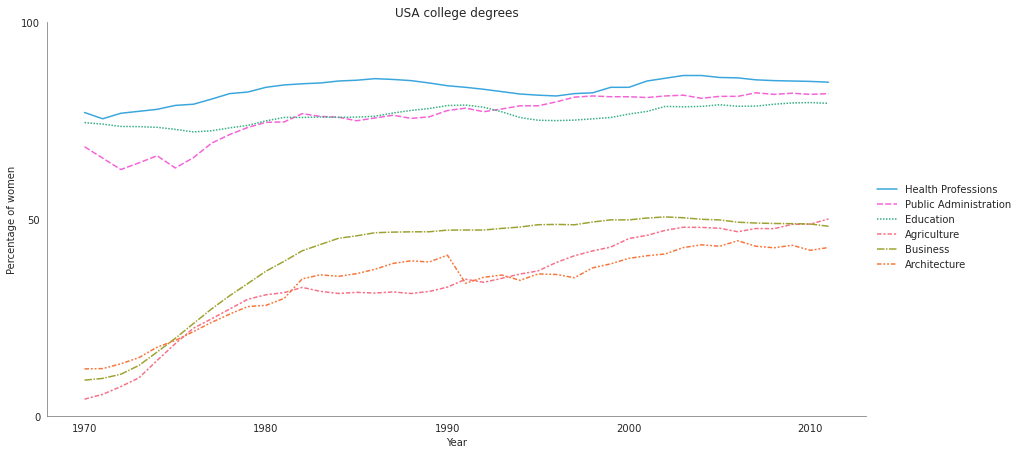

In [9]:
line_chart(women_degrees[other_cats])

### By category comparison

To reimplement the same idea as in the task - seeing each category in a separate small chart but still address all the aforementioned issues we could draw only one data line but fill in the empty space of the chart with some colors to emphisize that we are interested in both sides of the line - male and female percentage.

One issue with this approach though it violates another principle that Tufte propagated - number of dimentions in the chart should not be larger than number of dimentions in data. When we are filling in the space on the chart we are using area under the line as the main player, not the line itself.

In [10]:
sns.color_palette("husl", 2)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681)]

<AxesSubplot:title={'center':'Psychology'}, xlabel='Year', ylabel='Percentage'>

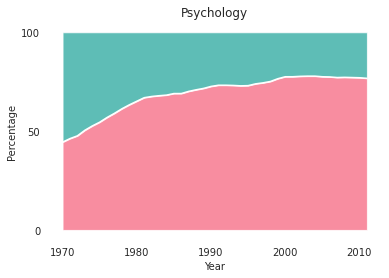

In [11]:
def create_filled_subplot(degree, **kwargs):
    ax = sns.lineplot(data=degree, color='white')

    ax.fill_between(degree.index, degree, 100, facecolor=sns.color_palette("husl", 2)[1], alpha=0.8)
    ax.fill_between(degree.index, 0, degree, facecolor=sns.color_palette("husl", 2)[0], alpha=0.8)
    sns.despine(left=True, bottom=True)
    ax.set_yticks([0, 50, 100])
    ax.set_ylabel('Percentage')
    ax.set_title(degree.name)
    
    return ax

# a test of a single subplot
# create_filled_subplot(women_degrees['Biology'])
create_filled_subplot(women_degrees['Psychology'])

In [12]:
# converting to long format for using in sns.FacetGrid
women_degrees_melted = women_degrees.melt(var_name='degree', ignore_index=False)
# women_degrees_melted

In [13]:
# keep the order of plots defined in the task
col_order = []

for i in range(6):
    lib_arts_cat_norm = lib_arts_cats + ['']
    row = (stem_cats[i], lib_arts_cat_norm[i], other_cats[i])
    col_order.extend(row)
    
# col_order

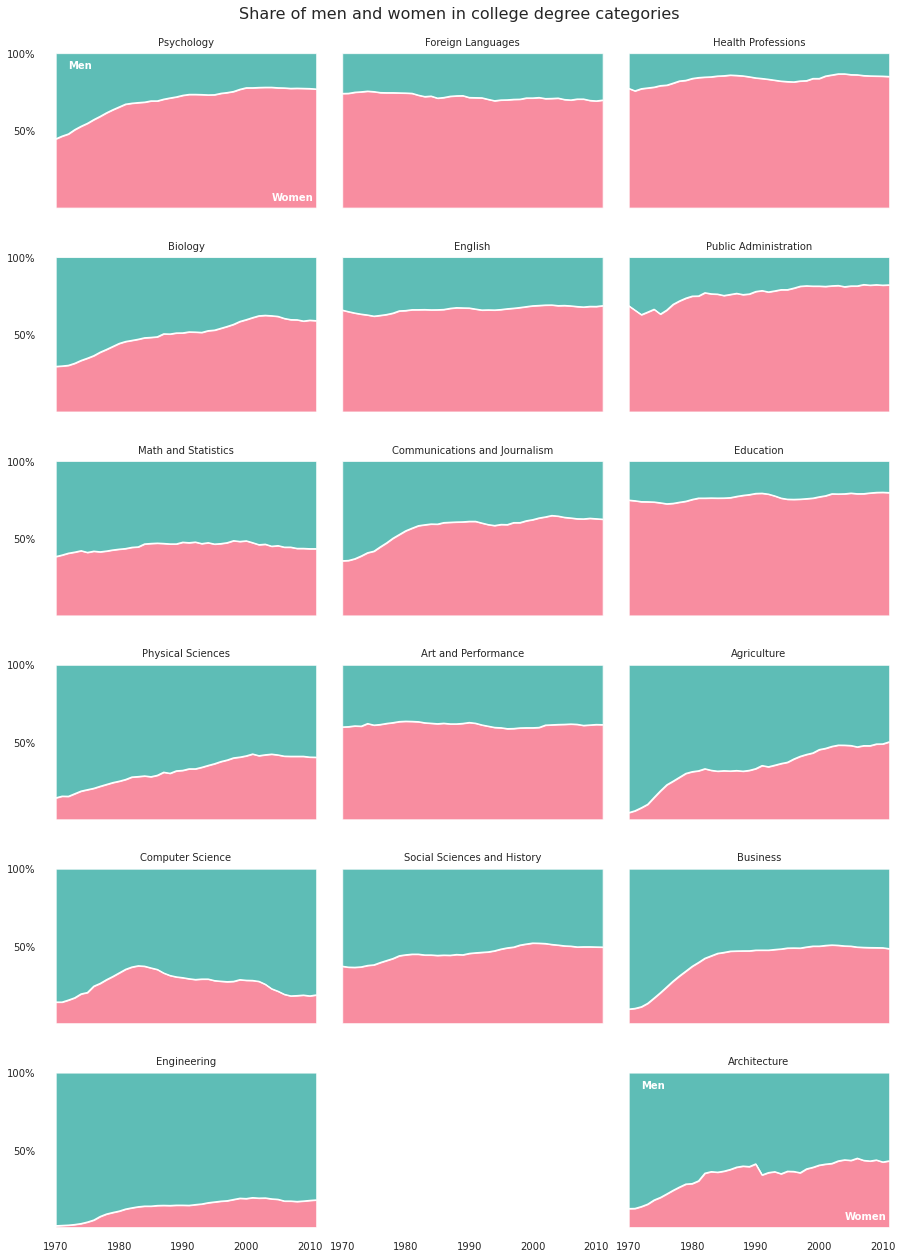

In [14]:
def add_labels(ax):
    ax.text(1972, 90,'Men', color='white', fontweight='bold')
    ax.text(2004, 5,'Women', color='white', fontweight='bold')


g = sns.FacetGrid(
                    data=women_degrees_melted,
                    col="degree",
                    col_wrap=3,
                    col_order=col_order,
                    aspect=1.4
)
g.map(create_filled_subplot, "value")
g.set_titles('{col_name}', pad=0.3)
plt.subplots_adjust(
    top=0.95,
    hspace=0.2, 
    wspace=0
)
add_labels(g.axes[0])
add_labels(g.axes[-1])
g.set_yticklabels(['', '50%', '100%'])
g.set_xlabels('')
g.fig.suptitle('Share of men and women in college degree categories', fontsize=16)
plt.show()